# Heart Disease Prediction

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

## Loading Dataset

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

## A quick look at Dataset

In [3]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


## Top 5 and Bottom 5 from dataset

In [4]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


## Dimensions of Dataframe

In [6]:
df.shape

(270, 14)

## Details of dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

## Checking for null values

In [8]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

## Looking at columns of Dataset

In [9]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

##  Understanding the dataset


In [10]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [11]:
df['Heart Disease'].count()

270

## Percentage contribution of both categories

In [12]:
df['Heart Disease'].value_counts(normalize=True)*100

Absence     55.555556
Presence    44.444444
Name: Heart Disease, dtype: float64

Text(0.5, 1.0, 'Heart Disease')

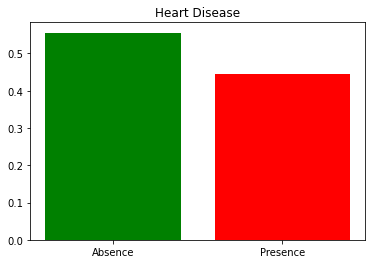

In [13]:
plt.bar(list(("Absence","Presence")),list(df['Heart Disease'].value_counts(normalize=True)),color=["green","red"])
plt.title('Heart Disease')

## Analysis of Age variable

In [14]:
df['Age'].count()

270

In [15]:
df['Age'].value_counts()

54    16
58    15
51    12
57    12
59    12
60    12
52    11
62    11
44    10
41     9
56     9
64     9
65     8
67     8
42     8
53     7
63     7
61     7
46     7
45     7
48     7
43     7
50     7
55     6
66     6
49     5
70     4
47     4
40     3
71     3
39     3
35     3
69     3
68     3
37     2
34     2
76     1
74     1
38     1
77     1
29     1
Name: Age, dtype: int64

In [16]:
df['Age'].value_counts(normalize=True)*100

54    5.925926
58    5.555556
51    4.444444
57    4.444444
59    4.444444
60    4.444444
52    4.074074
62    4.074074
44    3.703704
41    3.333333
56    3.333333
64    3.333333
65    2.962963
67    2.962963
42    2.962963
53    2.592593
63    2.592593
61    2.592593
46    2.592593
45    2.592593
48    2.592593
43    2.592593
50    2.592593
55    2.222222
66    2.222222
49    1.851852
70    1.481481
47    1.481481
40    1.111111
71    1.111111
39    1.111111
35    1.111111
69    1.111111
68    1.111111
37    0.740741
34    0.740741
76    0.370370
74    0.370370
38    0.370370
77    0.370370
29    0.370370
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Age'}>

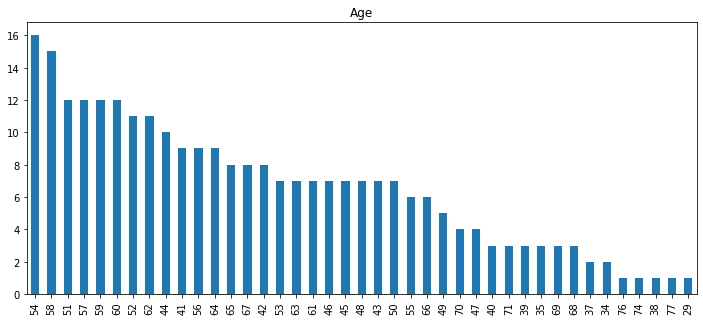

In [17]:
plt.figure(figsize=(12,5))
df['Age'].value_counts().plot.bar(title='Age')

## Analysis of Sex variable

In [18]:
df['Sex'].count()

270

In [19]:
df['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [20]:
df['Sex'].value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [21]:
df['Sex'].value_counts(normalize=True)*100

1    67.777778
0    32.222222
Name: Sex, dtype: float64

Text(0.5, 1.0, 'Sex')

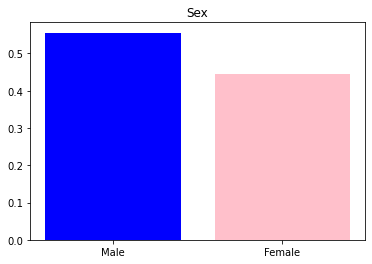

In [22]:
plt.bar(list(("Male","Female")),list(df['Heart Disease'].value_counts(normalize=True)),color=["blue","pink"])
plt.title('Sex')

## Analysis of Chest Pain Type variable

In [23]:
df['Chest pain type'].count()

270

In [24]:
df['Chest pain type'].value_counts()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [25]:
df['Chest pain type'].value_counts(normalize=True)*100

4    47.777778
3    29.259259
2    15.555556
1     7.407407
Name: Chest pain type, dtype: float64

Text(0.5, 1.0, 'Chest pain type')

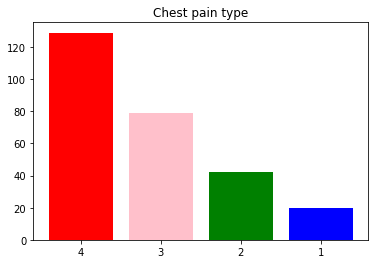

In [26]:
plt.bar(list(("4","3","2","1")),list(df['Chest pain type'].value_counts()),color=["red","pink","green","blue"])
plt.title("Chest pain type")

## Checking for outliers

C:\Users\balya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

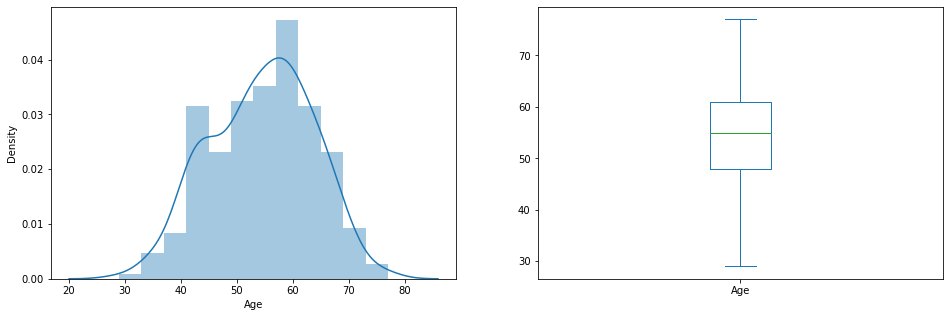

In [27]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(df['Age'])

plt.subplot(1,2,2)
df['Age'].plot.box(figsize=(16,5))

Text(0.5, 0.98, ' ')

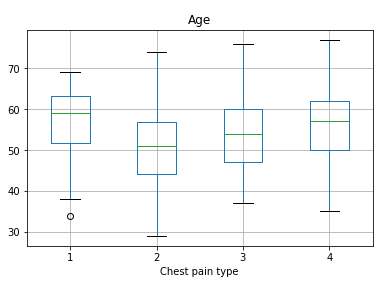

In [28]:
df.boxplot(column='Age',by='Chest pain type')
plt.suptitle(" ")

## Visualizing the Chest Pain type

Heart Disease    Absence  Presence
Chest pain type                   
1                     15         5
2                     35         7
3                     62        17
4                     38        91


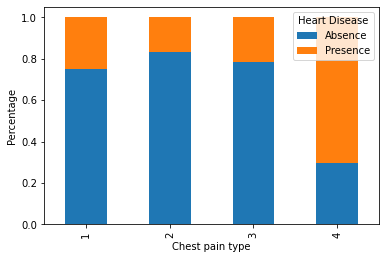

In [29]:
print(pd.crosstab(df['Chest pain type'],df['Heart Disease']))
Sex = pd.crosstab(df['Chest pain type'],df['Heart Disease'])
Sex.div(Sex.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel("Chest pain type")
plt.ylabel("Percentage")
plt.show()

## Visualizing the Heart Disease gender wise

<AxesSubplot:xlabel='Heart Disease'>

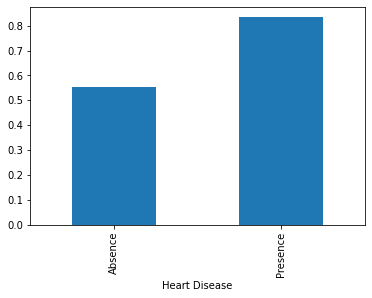

In [30]:
df.groupby("Heart Disease")['Sex'].mean().plot.bar()

In [31]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

## Label encoding non-numeric columns

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
dfle = df
dfle['Presence'] = le.fit_transform(dfle['Heart Disease'])
dfle.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0


In [34]:
dfle = dfle.drop('Heart Disease',axis='columns')
dfle.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


## Separating out the dependent and independent columns

In [35]:
x = dfle.drop('Presence',axis='columns')
y = dfle.Presence

## Splitting the dataset into train and test set

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

## Training the model

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [38]:
model1.fit(x_train,y_train)

C:\Users\balya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
print("The Accuracy using Logistic Regression is :", (model1.score(x_test,y_test))*100)

The Accuracy using Logistic Regression is : 85.18518518518519


### Decesion Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()

In [41]:
model2.fit(x_train,y_train)print("The Accuracy using Random Forest is :", (model3.score(x_test,y_test))*100)

DecisionTreeClassifier()

In [42]:
print("The Accuracy using Decision Tree is :", (model2.score(x_test,y_test))*100)

The Accuracy using Decision Tree is : 77.77777777777779


### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

In [44]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
print("The Accuracy using Random Forest is :", (model3.score(x_test,y_test))*100)

The Accuracy using Random Forest is : 83.9506172839506


### SVM(Support Vector Machine)


In [46]:
from sklearn.svm import SVC
model4 = SVC()

In [47]:
model4.fit(x_train,y_train)

SVC()

In [48]:
print("The Accuracy using SVM is :", (model4.score(x_test,y_test))*100)

The Accuracy using SVM is : 59.25925925925925


### Naive_Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()

In [50]:
model5.fit(x_train,y_train)

GaussianNB()

In [51]:
print("The Accuracy using Naive Bayes is :", (model5.score(x_test,y_test))*100)

The Accuracy using Naive Bayes is : 81.48148148148148


### XGBoost

In [58]:
from xgboost import XGBClassifier
model6 = XGBClassifier()

In [59]:
model6.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [60]:
print("The Accuracy using XGBoost is :", (model6.score(x_test,y_test))*100)

The Accuracy using XGBoost is : 85.18518518518519


## Getting accuracy of various models used

In [61]:
print("1. Logistic Regression: ",model1.score(x_test,y_test)*100)
print("2. Decision Tree      : ",model2.score(x_test,y_test)*100)
print("3. Random Forest      : ",model3.score(x_test,y_test)*100)
print("4. SVM                : ",model4.score(x_test,y_test)*100)
print("5. Naive Bayes        : ",model5.score(x_test,y_test)*100)
print("6. XGBoost            : ",model6.score(x_test,y_test)*100)

1. Logistic Regression:  85.18518518518519
2. Decision Tree      :  77.77777777777779
3. Random Forest      :  83.9506172839506
4. SVM                :  59.25925925925925
5. Naive Bayes        :  81.48148148148148
6. XGBoost            :  85.18518518518519


## Making Predictions on test dataset

In [64]:
y_predicted = model5.predict(x_test)
y_predicted

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

### Visualizing the score


In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[37,  4],
       [11, 29]], dtype=int64)

In [67]:
((29+37)/(37+4+11+29))*100

81.48148148148148

Text(33.0, 0.5, 'Truth')

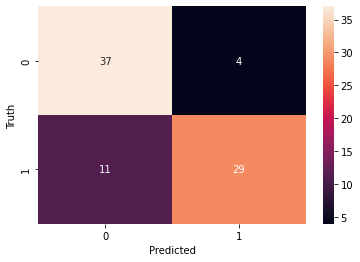

In [69]:
import seaborn as sb
plt.figure(figsize=(6,4))
sb.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
print('Confusion matrix \n')
print(metrics.confusion_matrix(y_test,y_predicted))
print('*'*80)
print('\n')
print('Classification report \n')
print(metrics.classification_report(y_test,y_predicted))

Confusion matrix 

[[37  4]
 [11 29]]
********************************************************************************


Classification report 

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        41
           1       0.88      0.72      0.79        40

    accuracy                           0.81        81
   macro avg       0.82      0.81      0.81        81
weighted avg       0.82      0.81      0.81        81



# END !
# Thank You 
